In [1]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
!pip install pingouin
import pingouin as pg
from statsmodels.stats.power import TTestIndPower

# Data loading

In [2]:
# Use the upload method to upload the data file
uploaded = files.upload()

data_path = 'INF2178_A4_data.csv'

# Load the dataset
data = pd.read_csv(data_path)

Saving INF2178_A4_data.csv to INF2178_A4_data.csv


# Data examination

In [3]:
# Display the first few rows of the dataset and its summary
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [4]:
# Drop rows with any missing values
data = data.dropna()

In [5]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values

Unnamed: 0    0
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

# Data exploration(EDA)

In [6]:
data.describe()

,Unnamed: 0,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,189.007168,1.491039,353.200717,76.394265,14.684588,2.491039,27.318996,0.284946,1479.433692,0.731703,1.202577
std,105.132701,0.500818,404.525563,7.775314,2.901404,1.128008,3.435222,0.382141,176.748150,0.038061,0.138758
min,0.000000,1.000000,0.000000,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,97.500000,1.000000,0.000000,71.000000,12.000000,2.000000,26.000000,0.000000,1348.500000,0.702000,1.118500
50%,193.000000,1.000000,0.000000,76.000000,15.000000,2.000000,29.000000,0.000000,1461.000000,0.732000,1.202000
75%,280.500000,2.000000,673.000000,82.000000,16.500000,3.000000,30.000000,0.500000,1568.500000,0.757000,1.301500
max,371.000000,2.000000,1707.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


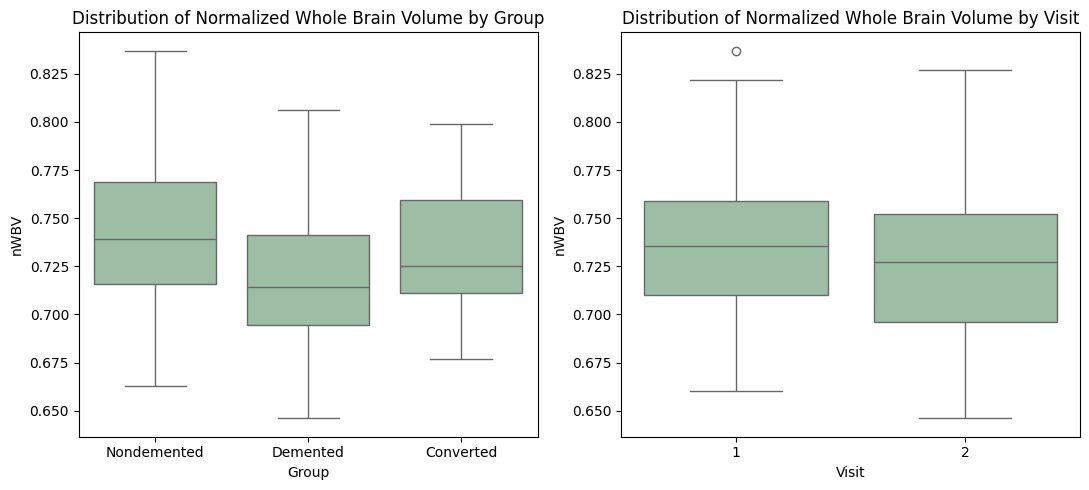

In [7]:
import seaborn as sns
# Visualize the data distribution by group and visit, showing only outliers as dots
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
ax = sns.boxplot(x='Group', y='nWBV', data=data, color='#99c2a2')
plt.title('Distribution of Normalized Whole Brain Volume by Group')

plt.subplot(1, 2, 2)
ax = sns.boxplot(x='Visit', y='nWBV', data=data, color='#99c2a2')
plt.title('Distribution of Normalized Whole Brain Volume by Visit')

plt.tight_layout()
plt.show()

<ipython-input-8-bcafbc8eb8fa>:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=data, x='Visit', y='nWBV', hue='Group', dodge=True,


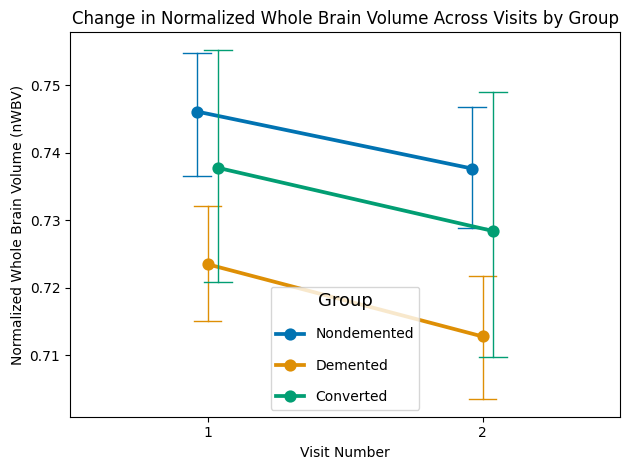

In [8]:
sns.pointplot(data=data, x='Visit', y='nWBV', hue='Group', dodge=True,
              capsize=0.1, errwidth=1, palette='colorblind')

plt.title('Change in Normalized Whole Brain Volume Across Visits by Group')
plt.xlabel('Visit Number')
plt.ylabel('Normalized Whole Brain Volume (nWBV)')
plt.legend(title='Group', title_fontsize='13', labelspacing=1.25)

plt.tight_layout()
plt.show()

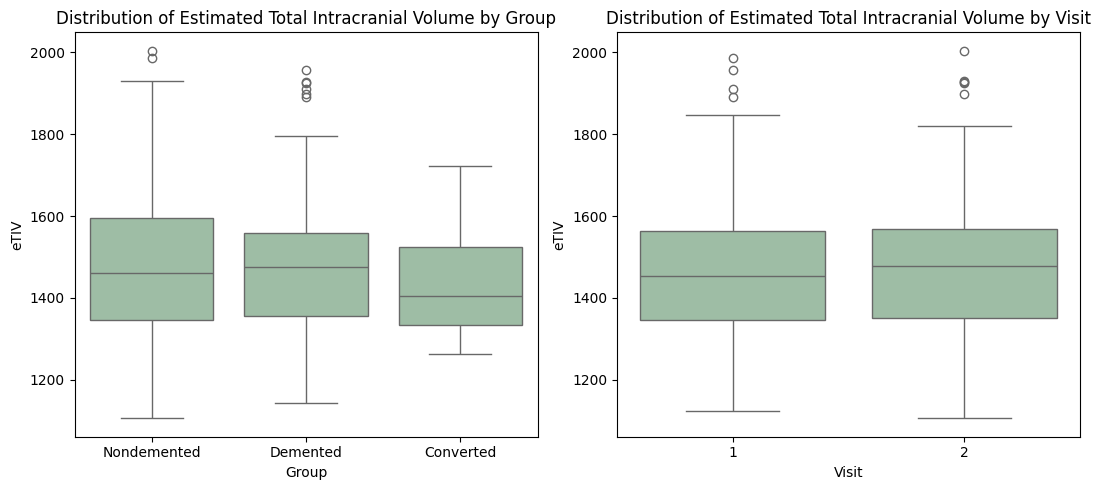

In [9]:
import seaborn as sns
# Visualize the data distribution by group and visit, showing only outliers as dots
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
ax = sns.boxplot(x='Group', y='eTIV', data=data, color='#99c2a2')
plt.title('Distribution of Estimated Total Intracranial Volume by Group')

plt.subplot(1, 2, 2)
ax = sns.boxplot(x='Visit', y='eTIV', data=data, color='#99c2a2')
plt.title('Distribution of Estimated Total Intracranial Volume by Visit')

plt.tight_layout()
plt.show()

<ipython-input-10-d43373b007a8>:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=data, x='Visit', y='eTIV', hue='Group', dodge=True,


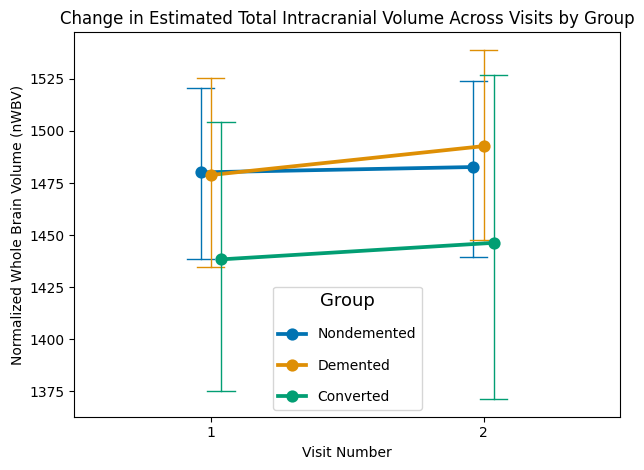

In [10]:
sns.pointplot(data=data, x='Visit', y='eTIV', hue='Group', dodge=True,
              capsize=0.1, errwidth=1, palette='colorblind')

plt.title('Change in Estimated Total Intracranial Volume Across Visits by Group')
plt.xlabel('Visit Number')
plt.ylabel('Normalized Whole Brain Volume (nWBV)')
plt.legend(title='Group', title_fontsize='13', labelspacing=1.25)

plt.tight_layout()
plt.show()

# Mixed-effects ANOVA(nWBV)

'Group' is the between-subject factor, 'Visit' is the within-subject factor, and 'nWBV' is the dependent variable

In [11]:
# Perform the mixed-effects ANOVA
mixed_anova_results_nWBV = pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=data).round(3)
mixed_anova_results_nWBV

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,0.033,2,134,0.017,6.384,0.002,0.087,NaN
1,Visit,0.006,1,134,0.006,89.376,0.000,0.400,1.0
2,Interaction,0.000,2,134,0.000,1.630,0.200,0.024,NaN


##Assumption testing

homogeneity test

In [12]:
# Homogeneity of variances using Levene's test
homogeneity_test_nWBV = pg.homoscedasticity(data, dv='nWBV', group='Group').round(3)
homogeneity_test_nWBV

,W,pval,equal_var
levene,0.489,0.614,True


In [13]:
# Extract the p-value from the test results
p_value = homogeneity_test_nWBV.loc['levene', 'pval']

# Interpret the results
if p_value < 0.05:
    print(f"The test is significant (p = {p_value:.3f}), suggesting that the variances are not equal across the groups.")
    print("We reject the null hypothesis of equal variances.")
else:
    print(f"The test is not significant (p = {p_value:.3f}), suggesting that the variances are equal across the groups.")
    print("We do not reject the null hypothesis of equal variances.")

The test is not significant (p = 0.614), suggesting that the variances are equal across the groups.
We do not reject the null hypothesis of equal variances.


normality test

In [14]:
# Normality test for the residuals(group is commonly tested)
normality_results_nWBV = pg.normality(data, dv='nWBV', group='Group').round(3)
normality_results_nWBV

,W,pval,normal
Group,,,
Nondemented,0.989,0.317,True
Demented,0.987,0.366,True
Converted,0.958,0.358,True


In [15]:
# Iterate through the results and provide an interpretation for each group
for index, row in normality_results_nWBV.iterrows():
    group_name = index  #  group names are used as index after the normality test
    p_value = row['pval']  # Ensure 'pval' is the correct column name for p-values

    print(f"\nNormality test for group {group_name}:")
    if p_value < 0.05:
        print(f"  With a p-value of {p_value:.3f}, there is significant evidence to conclude that the distribution for group {group_name} deviates from normality.")
        print("  Therefore, we reject the null hypothesis and infer that the data distribution is not normal.")
    else:
        print(f"  With a p-value of {p_value:.3f}, there is insufficient evidence to conclude that the distribution for group {group_name} deviates from normality.")
        print("  Therefore, we retain the null hypothesis and infer that the data distribution can be considered normal.")


Normality test for group Nondemented:
  With a p-value of 0.317, there is insufficient evidence to conclude that the distribution for group Nondemented deviates from normality.
  Therefore, we retain the null hypothesis and infer that the data distribution can be considered normal.

Normality test for group Demented:
  With a p-value of 0.366, there is insufficient evidence to conclude that the distribution for group Demented deviates from normality.
  Therefore, we retain the null hypothesis and infer that the data distribution can be considered normal.

Normality test for group Converted:
  With a p-value of 0.358, there is insufficient evidence to conclude that the distribution for group Converted deviates from normality.
  Therefore, we retain the null hypothesis and infer that the data distribution can be considered normal.


sphericity test

In [16]:
# Mauchly's test for sphericity
mauchly_results_nWBV = pg.sphericity(data, dv='nWBV', within='Visit', subject='Subject ID')
mauchly_results_nWBV

(True, nan, nan, 1, 1.0)

In [17]:
import pingouin as pg

# 'Subject ID' is the subject identifier, and 'Visit' is the within-subject factor
# Perform Mauchly's test of sphericity
sphericity_test_nWBV = pg.sphericity(data=data, dv='nWBV', subject='Subject ID', within='Visit')

# Unpack the results
sphericity_result, p_value, _, _, _ = sphericity_test_nWBV

# Print the sphericity test result and p-value
print(f"Sphericity Test Result: {sphericity_result}")
print(f"Sphericity p-value: {p_value}")

# Interpret the results
if p_value is not None and not pd.isna(p_value):
    if p_value < 0.05:
        print(f"The test is significant (p = {p_value:.3f}), indicating a violation of the sphericity assumption.")
        print("Adjustments to degrees of freedom (e.g., Greenhouse-Geisser, Huynh-Feldt) may be required in ANOVA tests.")
    else:
        print(f"The test is not significant (p = {p_value:.3f}), indicating that the sphericity assumption is met.")
        print("No adjustments to degrees of freedom are required in ANOVA tests.")
else:
    print("Sphericity p-value is NaN, which may occur due to insufficient data or too few levels in the within-subject factor.")
    print("Sphericity cannot be assessed, and should consider using corrections for sphericity in ANOVA as a precaution.")


Sphericity Test Result: True
Sphericity p-value: nan
Sphericity p-value is NaN, which may occur due to insufficient data or too few levels in the within-subject factor.
Sphericity cannot be assessed, and should consider using corrections for sphericity in ANOVA as a precaution.


##post hoc

In [18]:
# conduct post-hoc tests between group levels
#  Group effect is significant, and plus post-hoc testing is not typically conducted for within-subjects factors
post_hoc_results_nWBV  = pg.pairwise_ttests(dv='nWBV', between='Group', subject='Subject ID', data=data, padjust='fdr_bh').round(3)
post_hoc_results_nWBV

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Group,Converted,Demented,False,True,2.058,37.538,two-sided,0.047,0.07,fdr_bh,1.429,0.447
1,Group,Converted,Nondemented,False,True,-1.142,37.782,two-sided,0.260,0.26,fdr_bh,0.395,-0.222
2,Group,Demented,Nondemented,False,True,-5.195,247.487,two-sided,0.000,0.00,fdr_bh,3.011e+04,-0.646


The post-hoc tests indicate a significant and robust difference between the Demented and Nondemented groups, with less distinct variations when comparing the Converted group to others.

# Mixed-effects ANOVA(eTIV)

'Group' is the between-subject factor, 'Visit' is the within-subject factor, and 'eTIV' is the dependent variable

In [19]:
# Perform the mixed-effects ANOVA
mixed_anova_results_eTIV = pg.mixed_anova(dv='eTIV', within='Visit', between='Group', subject='Subject ID', data=data).round(3)
mixed_anova_results_eTIV

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,38580.795,2,134,19290.398,0.306,0.737,0.005,NaN
1,Visit,5073.142,1,134,5073.142,8.139,0.005,0.057,1.0
2,Interaction,953.089,2,134,476.545,0.765,0.468,0.011,NaN


##Assumption testing

homogeneity test

In [20]:
# Homogeneity of variances using Levene's test
homogeneity_test_eTIV = pg.homoscedasticity(data, dv='eTIV', group='Group').round(3)
homogeneity_test_eTIV

,W,pval,equal_var
levene,1.319,0.269,True


In [21]:
# Extract the p-value from the test results
p_value = homogeneity_test_eTIV.loc['levene', 'pval']

# Interpret the results
if p_value < 0.05:
    print(f"The test is significant (p = {p_value:.3f}), suggesting that the variances are not equal across the groups.")
    print("We reject the null hypothesis of equal variances.")
else:
    print(f"The test is not significant (p = {p_value:.3f}), suggesting that the variances are equal across the groups.")
    print("We do not reject the null hypothesis of equal variances.")

The test is not significant (p = 0.269), suggesting that the variances are equal across the groups.
We do not reject the null hypothesis of equal variances.


normality test

In [22]:
# Normality test for the residuals(group is commonly tested)
normality_results_eTIV = pg.normality(data, dv='eTIV', group='Group').round(3)
normality_results_eTIV

,W,pval,normal
Group,,,
Nondemented,0.973,0.006,False
Demented,0.959,0.002,False
Converted,0.918,0.041,False


In [23]:
# Iterate through the results and provide an interpretation for each group
for index, row in normality_results_eTIV.iterrows():
    group_name = index  #  group names are used as index after the normality test
    p_value = row['pval']  # Ensure 'pval' is the correct column name for p-values

    print(f"\nNormality test for group {group_name}:")
    if p_value < 0.05:
        print(f"  With a p-value of {p_value:.3f}, there is significant evidence to conclude that the distribution for group {group_name} deviates from normality.")
        print("  Therefore, we reject the null hypothesis and infer that the data distribution is not normal.")
    else:
        print(f"  With a p-value of {p_value:.3f}, there is insufficient evidence to conclude that the distribution for group {group_name} deviates from normality.")
        print("  Therefore, we retain the null hypothesis and infer that the data distribution can be considered normal.")


Normality test for group Nondemented:
  With a p-value of 0.006, there is significant evidence to conclude that the distribution for group Nondemented deviates from normality.
  Therefore, we reject the null hypothesis and infer that the data distribution is not normal.

Normality test for group Demented:
  With a p-value of 0.002, there is significant evidence to conclude that the distribution for group Demented deviates from normality.
  Therefore, we reject the null hypothesis and infer that the data distribution is not normal.

Normality test for group Converted:
  With a p-value of 0.041, there is significant evidence to conclude that the distribution for group Converted deviates from normality.
  Therefore, we reject the null hypothesis and infer that the data distribution is not normal.


sphericity test

In [24]:
# Mauchly's test for sphericity
mauchly_results_eTIV = pg.sphericity(data, dv='eTIV', within='Visit', subject='Subject ID')
mauchly_results_eTIV

(True, nan, nan, 1, 1.0)

In [25]:
import pingouin as pg

# 'Subject ID' is the subject identifier, and 'Visit' is the within-subject factor
# Perform Mauchly's test of sphericity
sphericity_test_eTIV = pg.sphericity(data=data, dv='eTIV', subject='Subject ID', within='Visit')

# Unpack the results
sphericity_result, p_value, _, _, _ = sphericity_test_eTIV

# Print the sphericity test result and p-value
print(f"Sphericity Test Result: {sphericity_result}")
print(f"Sphericity p-value: {p_value}")

# Interpret the results
if p_value is not None and not pd.isna(p_value):
    if p_value < 0.05:
        print(f"The test is significant (p = {p_value:.3f}), indicating a violation of the sphericity assumption.")
        print("Adjustments to degrees of freedom (e.g., Greenhouse-Geisser, Huynh-Feldt) may be required in ANOVA tests.")
    else:
        print(f"The test is not significant (p = {p_value:.3f}), indicating that the sphericity assumption is met.")
        print("No adjustments to degrees of freedom are required in ANOVA tests.")
else:
    print("Sphericity p-value is NaN, which may occur due to insufficient data or too few levels in the within-subject factor.")
    print("Sphericity cannot be assessed, and should consider using corrections for sphericity in ANOVA as a precaution.")


Sphericity Test Result: True
Sphericity p-value: nan
Sphericity p-value is NaN, which may occur due to insufficient data or too few levels in the within-subject factor.
Sphericity cannot be assessed, and should consider using corrections for sphericity in ANOVA as a precaution.


##post hoc

In [26]:
# conduct post-hoc tests between group levels
#  Group effect is significant, and plus post-hoc testing is not typically conducted for within-subjects factors
post_hoc_results_eTIV  = pg.pairwise_ttests(dv='eTIV', between='Group', subject='Subject ID', data=data, padjust='fdr_bh').round(3)
post_hoc_results_eTIV

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Group,Converted,Demented,False,True,-1.375,45.804,two-sided,0.176,0.321,fdr_bh,0.517,-0.258
1,Group,Converted,Nondemented,False,True,-1.262,43.089,two-sided,0.214,0.321,fdr_bh,0.448,-0.220
2,Group,Demented,Nondemented,False,True,0.191,241.681,two-sided,0.849,0.849,fdr_bh,0.141,0.024


# Statistical power(Question 2c)

Required sample size: 45.45073088568012


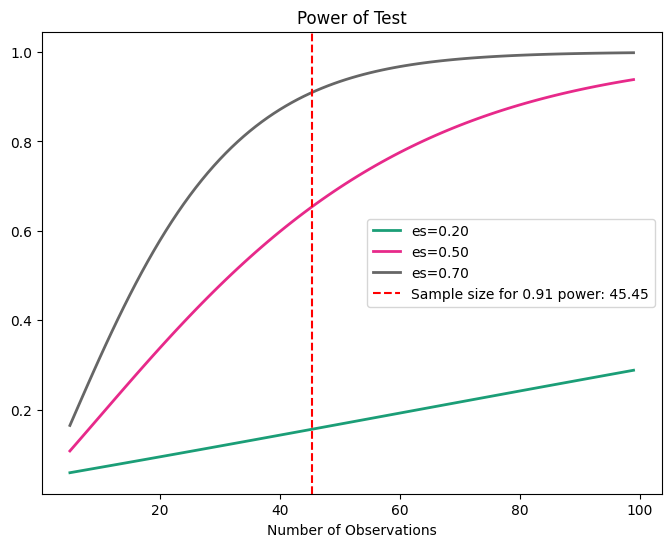

In [27]:
from statsmodels.stats.power import TTestIndPower
import numpy as np
# Parameters for the power analysis
effect_size = 0.7  # Large effect size
alpha = 0.05  # Significance level
power = 0.91  # Desired power

# Create a power analysis object
power_analysis = TTestIndPower()

# Calculate the sample size needed
sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha)
print(f'Required sample size: {sample_size}')

# Plotting the power analysis
fig, ax = plt.subplots(figsize=(8, 6))
power_analysis.plot_power(dep_var='nobs', nobs=np.arange(5, 100), effect_size=np.array([0.2, 0.5, 0.7]), alpha=0.05, ax=ax)
plt.axvline(x=sample_size, color='red', linestyle='--', label=f'Sample size for 0.91 power: {sample_size:.2f}')
plt.legend()
plt.show()
